In [1]:
import pandas as pd

In [239]:
genres=pd.read_csv("ml-100k/u.genre",sep="|",index_col=1,header=-1)
occups=pd.read_csv("ml-100k/u.occupation",sep="|",header=-1,encoding="latin-1")
#print(occups)
genres=genres[0]
genres


1
0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: 0, dtype: object

In [3]:
users=pd.read_csv("ml-100k/u.user",sep="|",header=-1,index_col=0)
len(users)

943

In [4]:
cols=["name","date","?","link"]
cols.extend(list(genres[0]))
cols

['name',
 'date',
 '?',
 'link',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [5]:
cols
items=pd.read_csv("ml-100k/u.item",sep="|",header=-1,index_col=0,encoding="latin-1", names=cols)
print(len(items))
items

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )
train1.head()

#import sys
#sys.getsizeof(train1)
train1.rating.unique()

array([5, 3, 4, 1, 2])

In [7]:
df=train1

In [86]:
import scipy.sparse
import numpy as np
avg=df.rating.mean()
print(avg)
#these are the ratings
user_item=scipy.sparse.coo_matrix((np.array(df["rating"]),(np.array(df["user"]-1),np.array(df["item"]-1))))
#these are if there is a rating
#user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))
print(user_item.count_nonzero())
#print(user_item_n.count_nonzero())
print(user_item.shape)
#print(user_item_n.shape)
avg_rat_item=np.array(user_item.mean(axis=0))[0,:]
avg_rat_user=np.array(user_item.mean(axis=1))[:,0]

#avg_rat_item.shape
#best_items=avg_rat_item.argsort()
#best_items
items["avg_rating"]=avg_rat_item
items["avg_rating-avg"]=avg_rat_item-users_g_df

users["avg_rating"]=avg_rat_usr
users["avg_rating-avg"]=avg_rat_user-users_g_df

users["n_ratings"]=[len(r) for r in user_item.tolil().rows]
items["n_ratings"]=[len(r) for r in user_item.T.tolil().rows]
print(users.n_ratings.sum())  #sanity check
print(items.n_ratings.sum())  #sanity check
items.sort_values(by="avg_rating",ascending=False)


users.sort_values(by="avg_rating",ascending=False)

3.52835
80000
(943, 1682)
80000
80000


,1,2,3,4,n_ratings,avg_rating,avg_rating-avg
0,,,,,,,
472,24,M,student,87544,263,3.637770,0.109420
474,51,M,executive,93711,327,3.636096,0.107746
450,35,F,educator,11758,494,3.625256,0.096906
532,20,M,student,92705,274,3.624802,0.096452
747,19,M,other,93612,293,3.620023,0.091673
907,25,F,other,80526,147,3.619511,0.091161
862,25,M,executive,13820,165,3.610290,0.081940
416,20,F,student,92626,417,3.608420,0.080070
457,33,F,salesman,30011,269,3.607942,0.079592


In [9]:
user_user=(user_item.dot(user_item.T)).toarray()
item_item=(user_item.T.dot(user_item)).toarray()
#user_user_n=(user_item_n.dot(user_item_n.T)).toarray()
#item_item_n=(user_item_n.T.dot(user_item_n)).toarray()

In [10]:
item_item_row_max=np.sqrt(item_item.max(axis=0))
item_item_norm=np.nan_to_num(item_item/item_item_row_max[:,np.newaxis]/item_item_row_max[np.newaxis,:])
user_user_row_max=np.sqrt(user_user.max(axis=0))
user_user_norm=np.nan_to_num(user_user/user_user_row_max[:,np.newaxis]/user_user_row_max[np.newaxis,:])


/home/baruselli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


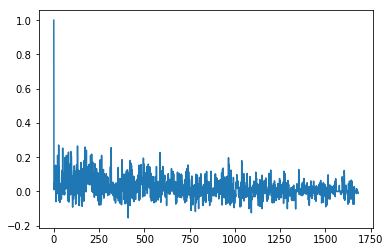

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(item_item_norm[0])

In [12]:
#from datetime import datetime
#datetime.fromtimestamp(train1.time[0])

In [13]:
sorting=item_item[0].argsort()[-10:]
items.iloc[sorting]

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
132,"Wizard of Oz, The (1939)",01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?Wizard%20of%2...,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
98,"Silence of the Lambs, The (1991)",01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Silence%20of%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
318,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Recommendation

In [87]:
n_items_rec=10

In [151]:
test1=pd.read_csv("ml-100k/u1.test",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )

avg_test=test1.rating.mean()
print(avg_test)
test1.head()

3.5359


,user,item,rating,time
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


## 1st strategy: recommend best overall items for everyone
Here I just find the movies with the highest average rating, and recommend them to everyone.

First I find the best movies

In [412]:
#The best n_items_rec movies
rec_items=items.sort_values(by="avg_rating",ascending=False)[:n_items_rec]
rec_items_index=rec_items.index
print(rec_items_index)
items.loc[rec_items_index][["name", "avg_rating"]]

Int64Index([50, 127, 174, 100, 318, 98, 313, 181, 64, 172], dtype='int64')


,name,avg_rating
50,Star Wars (1977),3.954944
127,"Godfather, The (1972)",3.791723
174,Raiders of the Lost Ark (1981),3.790543
100,Fargo (1996),3.771512
318,Schindler's List (1993),3.769899
98,"Silence of the Lambs, The (1991)",3.769596
313,Titanic (1997),3.749609
181,Return of the Jedi (1983),3.744719
64,"Shawshank Redemption, The (1994)",3.738507
172,"Empire Strikes Back, The (1980)",3.737403


In [413]:
#The average rating with n_items_rec=10 suggestions per user
test=test1[test1["item"].isin(rec_items_index)]
len(test),len(test1)
print("mean for the suggested items= ",test.rating.mean())

mean for the suggested items=  4.28428927680798


In [162]:
#Now I iterate over the number of reccomended items per user, rec_items_list

items_sorted=items.sort_values(by="avg_rating",ascending=False)

rec_items_list=list(range(len(items)))
n_reccs=[]
avg_rat=[]
n_reccs_train=[]
avg_rat_train=[]
for i in rec_items_list:
    rec_items=items_sorted[:i]                         #choose the first i items
    rec_items_index=rec_items.index                    #get their index
    test=test1[test1["item"].isin(rec_items_index)]    #find them in the test set
    train_comp=df[df["item"].isin(rec_items_index)]    #find them also in the train in the test set
    n_reccs.append(len(test))                          #find number of given recommendations found also in the test set
    avg_rat.append(test.rating.mean())                 # find the avg rating of the given recommendation
    n_reccs_train.append(len(train_comp))                          #find number of given recommendations found also in the train set
    avg_rat_train.append(train_comp.rating.mean())                 # find the avg rating of the given recommendation


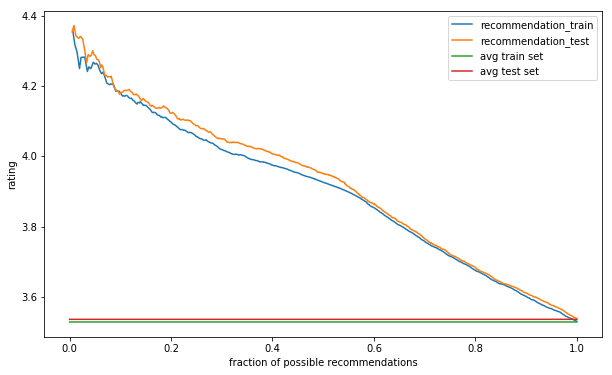

In [414]:
#And I plot the average score as a function of the verified raccomendations 
#(the ones present in the test set)/ the total possible raccomendations

f, ax = plt.subplots(1,1,figsize=(10,6))

#ax[0].plot(rec_items_list,avg_rat)
#ax[0].plot(rec_items_list,np.full(len(rec_items_list),avg))
#ax[1].plot(rec_items_list,n_reccs)
ax.plot(np.array(n_reccs_train)/max(n_reccs_train),avg_rat_train, label="recommendation_train")
ax.plot(np.array(n_reccs)/max(n_reccs),avg_rat, label="recommendation_test")
ax.plot(np.array(n_reccs)/max(n_reccs),np.full(len(n_reccs),avg),label="avg train set")
ax.plot(np.array(n_reccs)/max(n_reccs),np.full(len(n_reccs),avg_test),label="avg test set")
ax.set_xlabel("fraction of possible recommendations")
ax.set_ylabel("rating")
ax.legend();

This works already quite well.

## 2nd strategy: Suggest similar items to the liked ones (same genre)
This is possible because we know a priori the genre of the movies (this is still non-collaborative).

I need two things:

- the best items per genre;
- the prefereed genre(s) of each user.

Then I recommend to each user the most popular movies of his preferred genre(s).

In [406]:
#list_item_genre is a list of dfs, each with items within a given genre
list_item_genre=[]
for i,g in enumerate(genres):                #loop over genres
    items_g=list(items[items[g]==1].index)        #items of selected genre
    #print(items_g)
    user_item_g=user_item.tocsc()[:,[i-1 for i in items_g]]    #reviews of the selected genre; I use csc beacuse coo is not subscriptable
    avg_rat_item_g=np.array(user_item_g.mean(axis=0))[0,:]
    items_g_df=pd.DataFrame(index=items_g,data=avg_rat_item_g,columns=["avg_rating"])
    list_item_genre.append(items_g_df.sort_values("avg_rating",ascending=False))


In [407]:
#for example, 1 is action
items.loc[list_item_genre[1].index]

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,avg_rating-avg,n_ratings
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,3.954944,0.426594,484
127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,...,0,0,0,0,0,0,0,3.791723,0.263373,340
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,3.790543,0.262193,344
313,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,0,0,...,0,0,1,0,0,0,0,3.749609,0.221259,277
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,3.744719,0.216369,422
172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,3.737403,0.209053,295
173,"Princess Bride, The (1987)",01-Jan-1987,NaN,http://us.imdb.com/M/title-exact?Princess%20Br...,0,1,1,0,0,1,...,0,0,1,0,0,0,0,3.714415,0.186065,266
79,"Fugitive, The (1993)",01-Jan-1993,NaN,"http://us.imdb.com/M/title-exact?Fugitive,%20T...",0,1,0,0,0,0,...,0,0,0,0,1,0,0,3.685222,0.156872,267
22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,0,...,0,0,0,0,0,1,0,3.676260,0.147910,230
515,"Boot, Das (1981)",04-Apr-1997,NaN,"http://us.imdb.com/M/title-exact?Boot,%20Das%2...",0,1,0,0,0,0,...,0,0,0,0,0,1,0,3.653794,0.125444,166


In [408]:
#now each user gets a score of how much he likes / watches each genre

df_user_genre=pd.DataFrame()
for i,g in enumerate(genres):                     #loop over genres again
    items_g=list(items[items[g]==1].index)        #items of selected genre
    #print(items_g)
    user_item_g=user_item.tocsc()[:,[i-1 for i in items_g]]    #reviews of the selected genre; I use csc beacuse coo is not subscriptable
    avg_rat_user_g=np.array(user_item_g.mean(axis=1))[:,0]     #now I take the average rating per user!
    users_g_df=pd.DataFrame(index=users.index,data=avg_rat_user_g,columns=[g])
 #   print(users_g_df)
    df_user_genre = pd.concat([df_user_genre,users_g_df ], axis=1)
    #df_user_genre=df_user_genre.concat(users_g_df)
#items[items_g_df.index]
#items_g_df

df_user_genre

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,,,,,,,,,,,,,,,,,,,
1,0.0,-0.029172,-0.107064,0.007180,-0.142598,-0.011774,-0.016622,0.127165,0.030185,-0.024016,0.061319,-0.012102,-0.082888,0.055983,0.058204,0.118429,0.017210,0.009293,0.017469
2,0.0,0.011500,0.003494,0.011230,0.007732,0.002465,0.025962,0.000000,0.013583,0.000000,0.061319,-0.005743,-0.009435,0.015464,0.028872,-0.005231,0.019017,-0.014883,0.000000
3,0.0,-0.016614,-0.004334,0.000000,0.000000,-0.002317,-0.019389,0.029433,-0.004607,0.000000,-0.063681,-0.044095,-0.054584,-0.043307,-0.006417,-0.041288,-0.038865,-0.022325,0.000000
4,0.0,0.003306,-0.011741,0.000000,0.000000,0.005828,0.031330,0.029433,0.006090,0.000000,0.000000,0.000000,0.026279,0.039589,-0.002139,0.004108,0.011275,0.006643,0.000000
5,0.0,-0.025414,-0.011607,0.101068,-0.105480,-0.027988,0.026483,0.000000,-0.021237,0.000000,0.000000,-0.151361,-0.039764,-0.000930,-0.035446,0.008957,-0.014735,0.082111,-0.093643
6,0.0,-0.009775,-0.017755,0.007180,-0.048103,0.004741,0.011421,0.000000,0.005748,-0.138941,0.100623,0.010253,0.040087,0.013605,0.023905,-0.011585,0.020670,0.033215,0.032837
7,0.0,0.052912,0.087763,0.103768,0.070052,0.008365,0.032016,0.018866,0.075414,0.088332,-0.024377,-0.008628,0.144192,0.011746,0.021078,0.155226,0.061106,0.322601,-0.027969
8,0.0,0.037356,0.038431,0.000000,-0.033252,-0.013152,0.007614,0.000000,0.004632,0.000000,0.000000,0.000000,0.000000,-0.008661,0.009777,0.056599,-0.005114,0.013286,0.089443
9,0.0,0.017589,0.032703,0.000000,0.000000,0.008630,0.000000,0.000000,0.001873,0.000000,0.000000,0.015996,0.000000,0.000000,0.027651,0.019241,0.003758,0.005844,0.000000


In [409]:
#finally, I find the preferred genre of each user and suggest the best movies there